# Seminar 13

# Descent methods
# Five ways to get gradient descent

## Reminder
1. Introduction to numerical optimization
2. General scheme of a method
3. How to compare optimization methods?
4. Zoo of problems and corresponding methods
5. One-dimensional optimization

## What is descent method?

Sequence $x_k$ is generated according to the rule

$$
x_{k+1} = x_k + \alpha_k h_k
$$

so that

$$
f(x_{k+1}) < f(x_k)
$$

A direction $h_k$ is called *descent direction*.

**Remark**: there exist methods that do not require monotone descent of 

the objective function

```python
def DescentMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    while StopCriterion(x, f, **kwargs) > epsilon:
        
        h = ComputeDescentDirection(x, f, **kwargs)
        
        alpha = SelectStepSize(x, h, f, **kwargs)
        
        x = x + alpha * h
        
    return x

```

## Way 1: the locally best descent direction
Consider linear approximation of the differentiable function $f$ along some descent direction $h, \|h\|_2 = 1$:

$$
f(x + \alpha h) = f(x) + \alpha \langle f'(x), h \rangle + o(\alpha)
$$

From the descent condition follows

$$
f(x) + \alpha \langle f'(x), h \rangle + o(\alpha) < f(x)
$$

and while $\alpha \rightarrow 0$:

$$
\langle f'(x), h \rangle \leq 0
$$

Also from the Cauchy–Schwarz inequality we get

$$
\langle f'(x), h \rangle \geq -\| f'(x) \|_2 \| h \|_2 = -\| f'(x) \|_2
$$

Thus, anti-gradient direction

$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$

gives direction of **the steepest local** descent for objective function$~f$.

Finally we get the method

$$
x_{k+1} = x_k - \alpha f'(x_k)
$$

## Way 2: Euler scheme for solving ODE

Consider the following ODE:

$$
\frac{dx}{dt} = -f'(x(t))
$$

and discretize it on the uniform grid with grid size $\alpha$:

$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$

where $x_k \equiv x(t_k)$ and $\alpha = t_{k+1} - t_k$ - grid size.

From this discretization we get expression for $x_{k+1}$

$$
x_{k+1} = x_k - \alpha f'(x_k),
$$

which is equivalent to gradient descent.

Such scheme is called implicit or foreward Euler scheme

**Q:** what scheme is called backward Euler scheme? 

**A:** More details see in the [seminar](https://nbviewer.jupyter.org/github/amkatrutsa/MIPT-Opt/blob/master/ProxMethods/prox_methods_en.ipynb) on proximal methods.

## Way 3: manipulation with necessary optimality condition

\begin{align*}
& f'(x) = 0\\
& -\alpha f'(x) = 0\\
& x - \alpha f'(x) = x\\
& x_k - \alpha f'(x_k) = x_{k+1}
\end{align*}

This is **not** proof of correctness, only formal derivation of the method!

## Way 4: minimization of quadratic upper bound 
#### (A. V. Gasnikov  Universal gradient descent method  https://arxiv.org/abs/1711.00394 (russian))

Global upper bound of convex function $f$ in $x_k$:

$$
f(y) \leq f(x_k) + \langle f'(x_k), y - x_k \rangle + \frac{L}{2} \|y - x_k \|_2^2 = g(y), 
$$

where $\lambda_{\max}(f''(x)) \leq L$ for all feasible $x$.

Right-hand side quadratic form $g(y)$ has minimum point which can be derived analytically:
\begin{align*}
& g'(y^*) = 0 \\
& f'(x_k) + L (y^* - x_k) = 0 \\
& y^* = x_k - \frac{1}{L}f'(x_k) = x_{k+1}
\end{align*}
This way provides estimate for step size as $\frac{1}{L}$. However, often constant $L$ is unknown.

## Way 5: trust region approach

Minimization of linear approximation in the ball with radius $r$ and centered in $x_k$
\begin{align*}
& \min \; f(x_k) + \langle f'(x_k), x - x_k \rangle\\
\text{s.t. } & \| x - x_k \|^2_2 \leq r^2
\end{align*}

From the KKT conditions we get

$$
x_{k+1} = x_k - \frac{1}{2\lambda} f'(x_k),
$$

where $\lambda$ is Lagrange multiplier and

$$
\lambda = \frac{\| f'(x_k)\|_2}{2r}
$$

**Q:** how to choose $r$?

**Q:** how do Lipschitz constant $L$ of gradient $f'(x_k)$ from the way 4 and $\lambda$ from the way 5 relate to each other?

## All in all: gradient descent method 
```python
def GradientDescentMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    while StopCriterion(x, f, **kwargs) > epsilon:
        
        h = ComputeGradient(x, f, **kwargs)
        
        alpha = SelectStepSize(x, h, f, **kwargs)
        
        x = x - alpha * h
        
    return x

```

## How to choose $\alpha_k$? (J. Nocedal, S. Wright Numerical Optimization, $\S$ 3.1.)

List of approaches:
- Constant step size

$$
\alpha_k = \overline{\alpha}
$$

- Apriori sequence

$$
\alpha_k = \dfrac{\overline{\alpha}}{\sqrt{k+1}}
$$

- Steepest descent

$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

- Rule of **sufficient** decreasing, rule of **significant** decreasing and curvature rule: for some $\beta_1, \beta_2$, such that $0 < \beta_1 < \beta_2 < 1$ find $x_{k+1}$ such that

    - Sufficient decreasing: $f(x_{k+1}) \leq f(x_k) - \beta_1 \alpha_k \langle f'(x_k), h_k \rangle$ or
    $ f(x_k) - f(x_{k+1}) \geq \beta_1 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Significant decreasing: $f(x_{k+1}) \geq f(x_k) - \beta_2 \alpha_k \langle f'(x_k), h_k \rangle$ or
    $
    f(x_k) - f(x_{k+1}) \leq \beta_2 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Curvature rule: $\langle f'(x_{k+1}), h_k \rangle \geq \beta_2 \langle f'(x_k), h_k \rangle$

Usually coefficients are selected as: $\beta_1 \in (0, 0.3)$, and $\beta_2 \in (0.9, 1)$

### Analysis and motivation of the approaches to step size selection

- Constant step size: the most simple method, sometimes the single tractable method
- The steepest descent: the best method, but applicable only if auxilliary optimiztion problem has analytical solution or veryyy fast
- Rules for adaptive search:
    - sufficient decreasing rule guarantees that objective value in the point $x_{k+1}$ is not **larger** than linear approximatiuon with slope $\beta_1$
    - significant decreasing rule guarantees that objective value in the point $x_{k+1}$ is not **smaller** than linear approximatiuon with slope $\beta_2$
    - curvature rule guarantees that slope of tangent line in the point $x_{k+1}$ is not smaller than slope of tangent line in the point $x_k$, <br></br>
multiplicated by $\beta_2$ 

Significant decreasing rule and curvature rule provide decreasing of the objective function along given direction $h_k$. 

Usually only one of them is chosen.

#### Alternative names
- Rule of sufficient decreasing $\equiv$ Armijo rule
- Rule of sufficient decreasing + curvature rule $\equiv$ Wolfe rule
- Rule of sufficient decreasing + rule of significant decreasing $\equiv$ Goldstein rule

## Why do we need condition of significant decreasing?

<IPython.core.display.Javascript object>


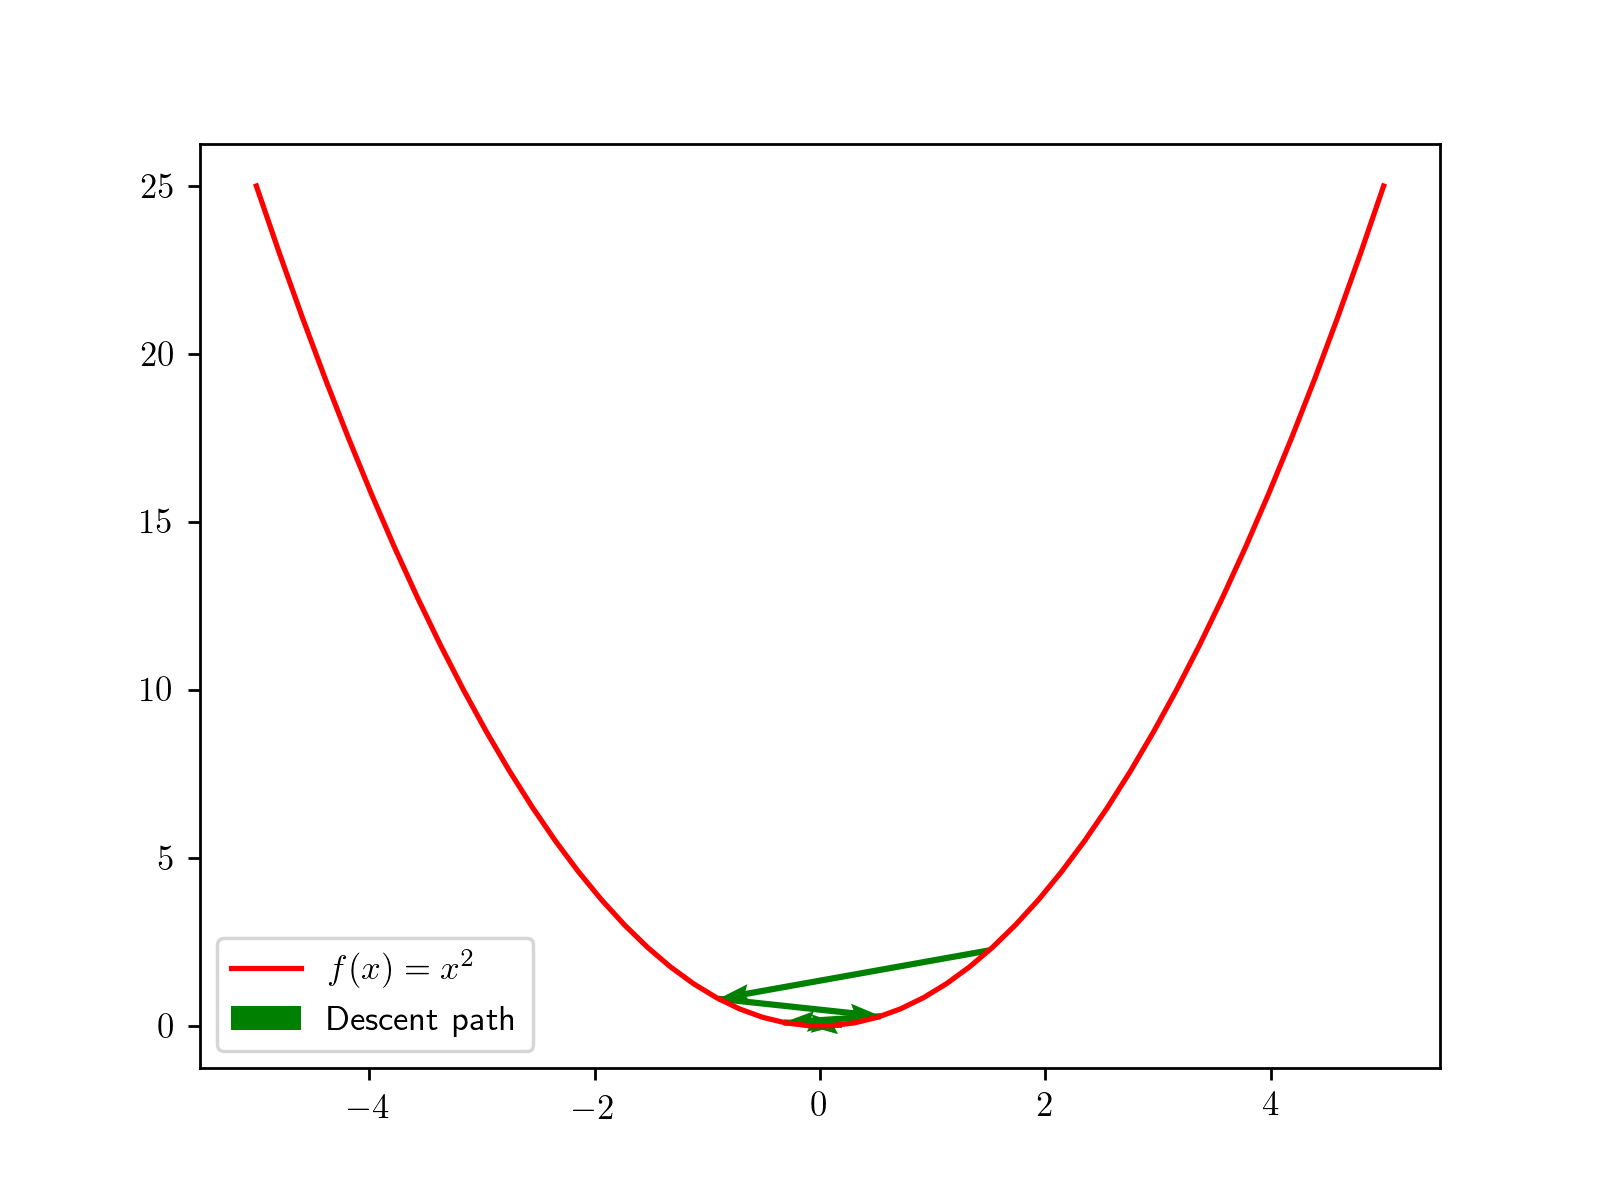

interactive(children=(FloatSlider(value=1.5, description='Initial point', max=4.0, min=-4.0), FloatSlider(value=0.8, description='Step', max=1.2), Output()), _dom_classes=('widget-interact',))

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as ipywidg
import numpy as np
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

f = lambda x: np.power(x, 2)
gradf = lambda x: 2 * x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.rc("text", usetex=True)


def update(x0, step):
    gd = methods.fo.GradientDescent(f, gradf, ss.ConstantStepSize(step))
    _ = gd.solve(np.array([x0]), max_iter=10)
    x_hist = gd.get_convergence()
    x = np.linspace(-5, 5)
    ax.clear()
    ax.plot(x, f(x), color="r", label="$f(x) = x^2$")
    y_hist = np.array([f(x) for x in x_hist])
    x_hist = np.array(x_hist)
    plt.quiver(x_hist[:-1], y_hist[:-1], x_hist[1:]-x_hist[:-1], y_hist[1:]-y_hist[:-1], 
               scale_units='xy', angles='xy', scale=1, width=0.005, color="green", label="Descent path")
    ax.legend()
    fig.canvas.draw()

step_slider = ipywidg.FloatSlider(value=0.8, min=0, max=1.2, step=0.1, description="Step")
x0_slider = ipywidg.FloatSlider(value=1.5, min=-4, max=4, step=0.1, description="Initial point")
_ = ipywidg.interact(update, x0=x0_slider, step=step_slider)

In [2]:
def plot_alpha(f, x, h, alphas):
    df = np.zeros_like(alphas)
    for i, alpha in enumerate(alphas):
        df[i] = f(x + alpha * h)
    plt.plot(alphas, df)
    plt.xlabel(r"$\alpha$", fontsize=18)
    plt.ylabel(r"$f(x + \alpha h)$", fontsize=18)

<IPython.core.display.Javascript object>


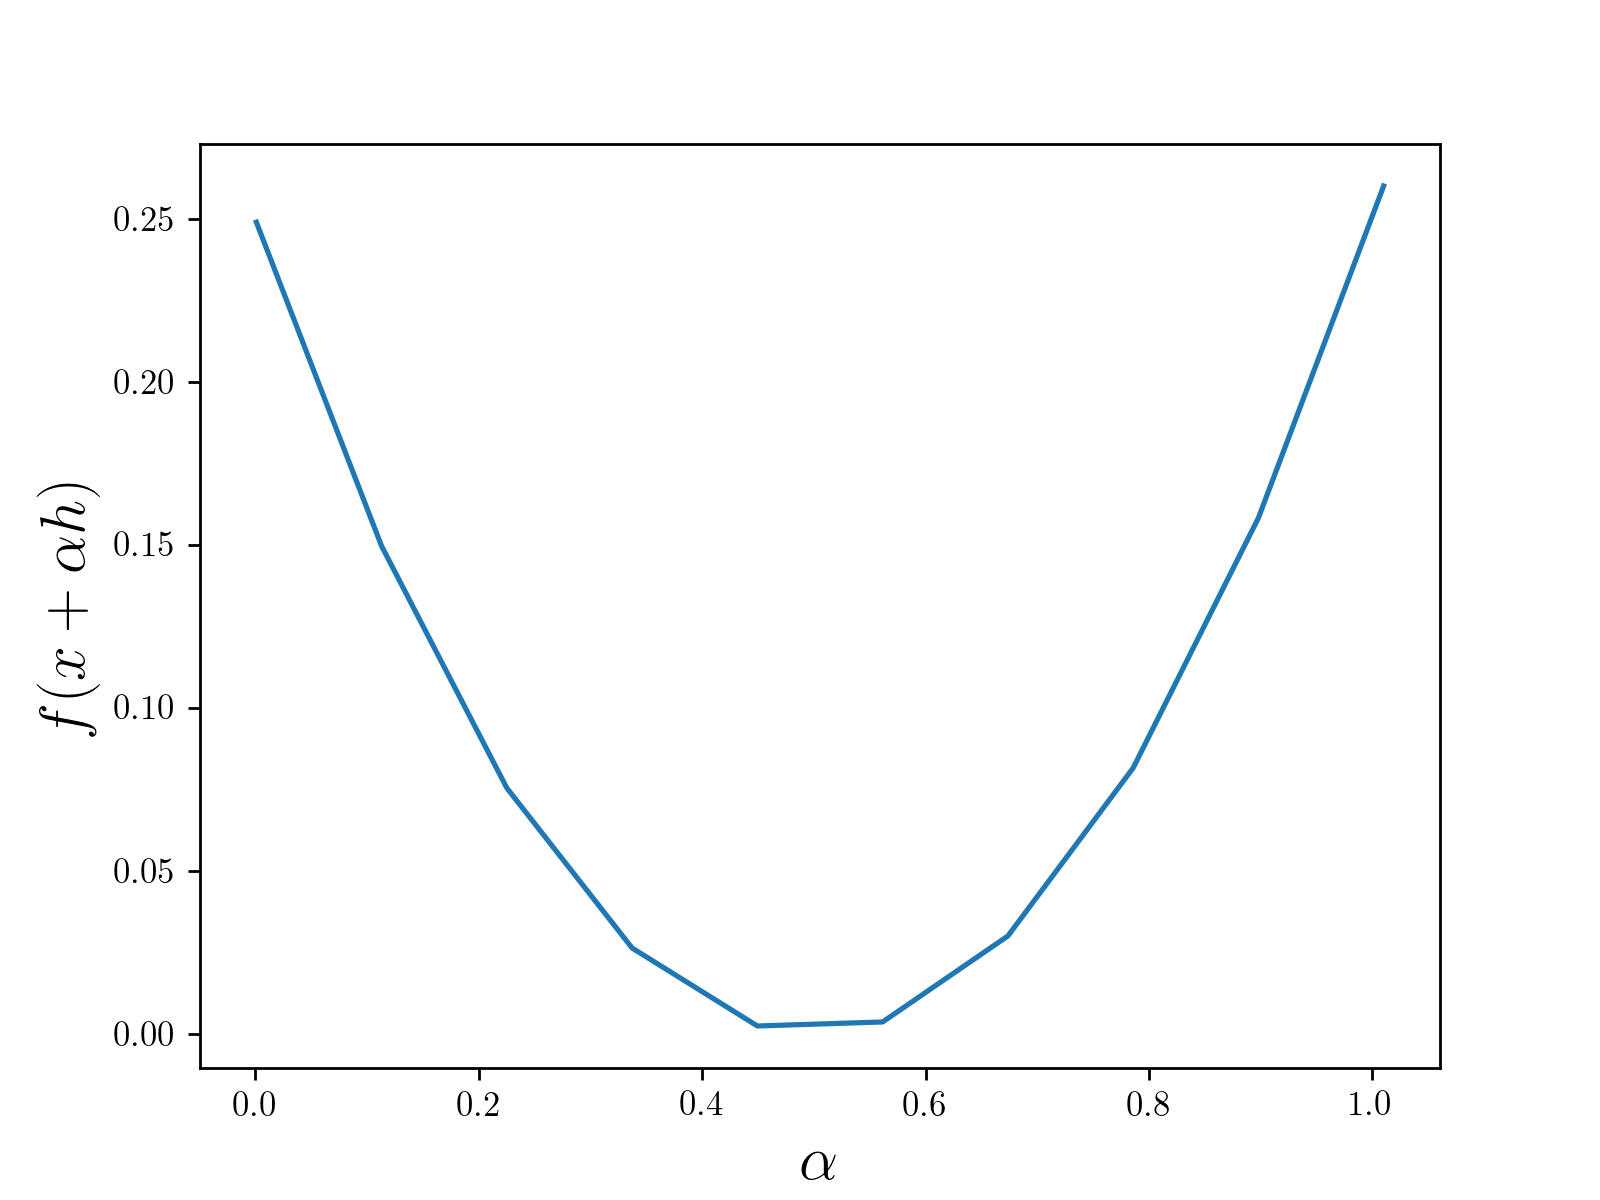

In [3]:
plot_alpha(lambda x: x**2, 0.5, -1, np.linspace(1e-3, 1.01, 10))

### Backtracking 

```python
def SelectStepSize(x, f, h, rho, alpha0, beta1, beta2):
    
    # 0 < rho < 1
    
    # alpha0 - initial guess of step size
    
    # beta1 and beta2 - constants from conditions
    
    alpha = alpha0
    
    # Check violating sufficient decrease 
    
    # and curvature conditions 
    
    while (f(x - alpha * h) >= 
           
           f(x) + beta1 * alpha * grad_f(x_k).dot(h)) and 
    
          (grad_f(x - alpha * h).dot(h) <= 
           
           beta2 * grad_f(x_k).dot(h)):
            
        alpha *= rho
        
    return alpha

```

## Convergence theorems (B. T. Polyak Introduction to optimization, ch. 1, $\S$ 4;  ch. 3, $\S$ 1; Y. E. Nesterov Introduction to convex optimization, $\S$ 2.2)
From general cases to special ones:

**Theorem 1.** 
Assume

- $f(x)$ is differentiable on $\mathbb{R}^n$, 
- gradient of $f(x)$ is Lischitz with constant $L$
- $f(x)$ is bounded below
- $\alpha = const$ and $0 < \alpha < \frac{2}{L}$

Then for gradient descent the following holds:

$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$

and objective decreases monotonely $f(x_{k+1}) < f(x_k)$.

**Theorem 2.**
Assume

- $f(x)$ is differentiable on $\mathbb{R}^n$, 
- gradient of $f(x)$ is continuous
- the set $\{ x: f(x) \leq f(x_0) \}$ is bounded
- $\alpha_k = \arg\min\limits_{\alpha \geq 0} f(x_k - \alpha f'(x_k))$

Then 

$$
f'(x_k) \to 0, \; k \to \infty \qquad x_{k_i} \to x^*
$$


**Theorem 3.** 
Assume
- $f(x)$ is differentiable on $\mathbb{R}^n$
- $f(x)$ is convex 
- $f'(x)$ is Lipschitz with constant $L$
- $\alpha = \dfrac{1}{L}$

Then

$$
f(x_k) - f^* \leq \dfrac{2L \| x_0 - x^*\|^2_2}{k+4}
$$


**Theorem 4.** 
Assume

- $f(x)$ is differentiable on $\mathbb{R}^n$, 
- gradient of $f(x)$ is Lipschitz with constant $L$
- $f(x)$ is strongly convex with constant $l$
- $\alpha = const$ and $0 < \alpha < \frac{2}{L}$

Then gradient descent converges to unique global minimizer $x^*$ with linear convergence speed:

$$
\| x_k - x^* \|_2 \leq cq^k, \qquad 0 \leq q < 1
$$

**Теорема 5.**
Assume

- $f(x)$ is differentiable on $\mathbb{R}^n$, 
- gradient of $f(x)$ is Lipschitz with constant $L$
- $f(x)$ is strongly convex with constant $l$
- $\alpha = \dfrac{2}{l + L}$

Then for gradient descent the following holds:

\begin{align*}
& \| x_k - x^* \|^2_2 \leq \left( \dfrac{M - 1}{M + 1} \right)^k \|x_0 - x^*\|^2_2\\
& f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{M - 1}{M + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
\end{align*}
where $M = \frac{L}{l}$

**Theorem 6.**
Assume 
- $f(x)$ is twice differentiable and $l\mathbf{I} \preceq f''(x) \preceq L\mathbf{I}$ for all $x$
- $\alpha = const$ and $0 < \alpha < \frac{2}{L}$

Then 
\begin{align*}
& \| x_k - x^*\|_2 \leq \|x_0 - x^*\|_2 q^k\\
& q = \max(|1 - \alpha l|, |1 - \alpha L|) < 1
\end{align*}
and optimal $q^* = \dfrac{L - l}{L + l}$ in the case $\alpha^* = \dfrac{2}{L + l}$

### From what quantities does $q^*$ depend and and how to use this dependance?
From theorems 5 and 6 follow 

$$
q^* = \dfrac{L - l}{L + l} = \dfrac{L/l - 1}{L/l + 1} = \dfrac{M - 1}{M + 1},
$$

where $M$ is estimate of the condition number $f''(x)$.

**Q**: what is condition number of a matrix?

- If $M \gg 1$, $q^* \to 1 \Rightarrow$, then convergence is veryyy slow. For example, if $M = 100$: $q^* \approx 0.98 $
- If $M \simeq 1$, $q^* \to 0 \Rightarrow$, then convergence is faster. For example, if $M = 4$: $q^* = 0.6 $

**Q**: what is geometrical interpretation of such dependance?

**Important point**: to speed up convergence estimate $M$ has to be as close to 1 as possible!

How to get this value for $M$ you will be asked in home assignment :) 

## Initial guess vector selection

Pay your attention that all theorems mentioned above do not restrict choice of initial guess vector $x_0$!

- For non convex functions gradient descent converges to some stationary point, which is a local minmizers almost sure (see this [paper](https://arxiv.org/pdf/1602.04915.pdf)), but also can be saddle-point
- For convex functions stationary point is minimizer
- Methods of initial guess vector selection:
    - random point
    - gradient-free methods using random search, for example [evolution algorithm](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.differential_evolution.html), ant colony method, etc
    - usually these methods give only small decreasing of the objective but can move far away from local minimizers

## Computational point of view and experiments
1. Every iteration of the method requires only storage of current point and gradient, therefore one needs $O(n)$ memory storage
2. Search of $\alpha_k$:
    - given apriori
    - analytical solution of the steepest descent problem
    - adaptive search which terminates in finite number of iterations
3. To go to the next iterand of the method, one has to compute linear combination of two vectors, therefore it costs $O(n)$ flops, which can be accelerated with high performance implementations

### Implementation of gradient descent

In [4]:
def GradientDescent(f, gradf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        alpha = line_search(x, -gradient, **opt_arg)
        x = x - alpha * gradient
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

### Step size selection

Implementations of different ways to select step size is provided [here](https://github.com/amkatrutsa/liboptpy/blob/master/step_size.py)

### Dependance on condition number of $f''(x)$
Consider the problem

$$
\min f(x),
$$ 

where
$$ f(x) = x^{\top}Ax, \; A = \begin{bmatrix} 1 & 0\\ 0 & \gamma \end{bmatrix} $$

$$
f'(x) = 2Ax
$$

In [2]:
def my_f(x, A):
    return 0.5 * x.dot(A.dot(x))

def my_gradf(x, A):
    return A.dot(x)

<IPython.core.display.Javascript object>


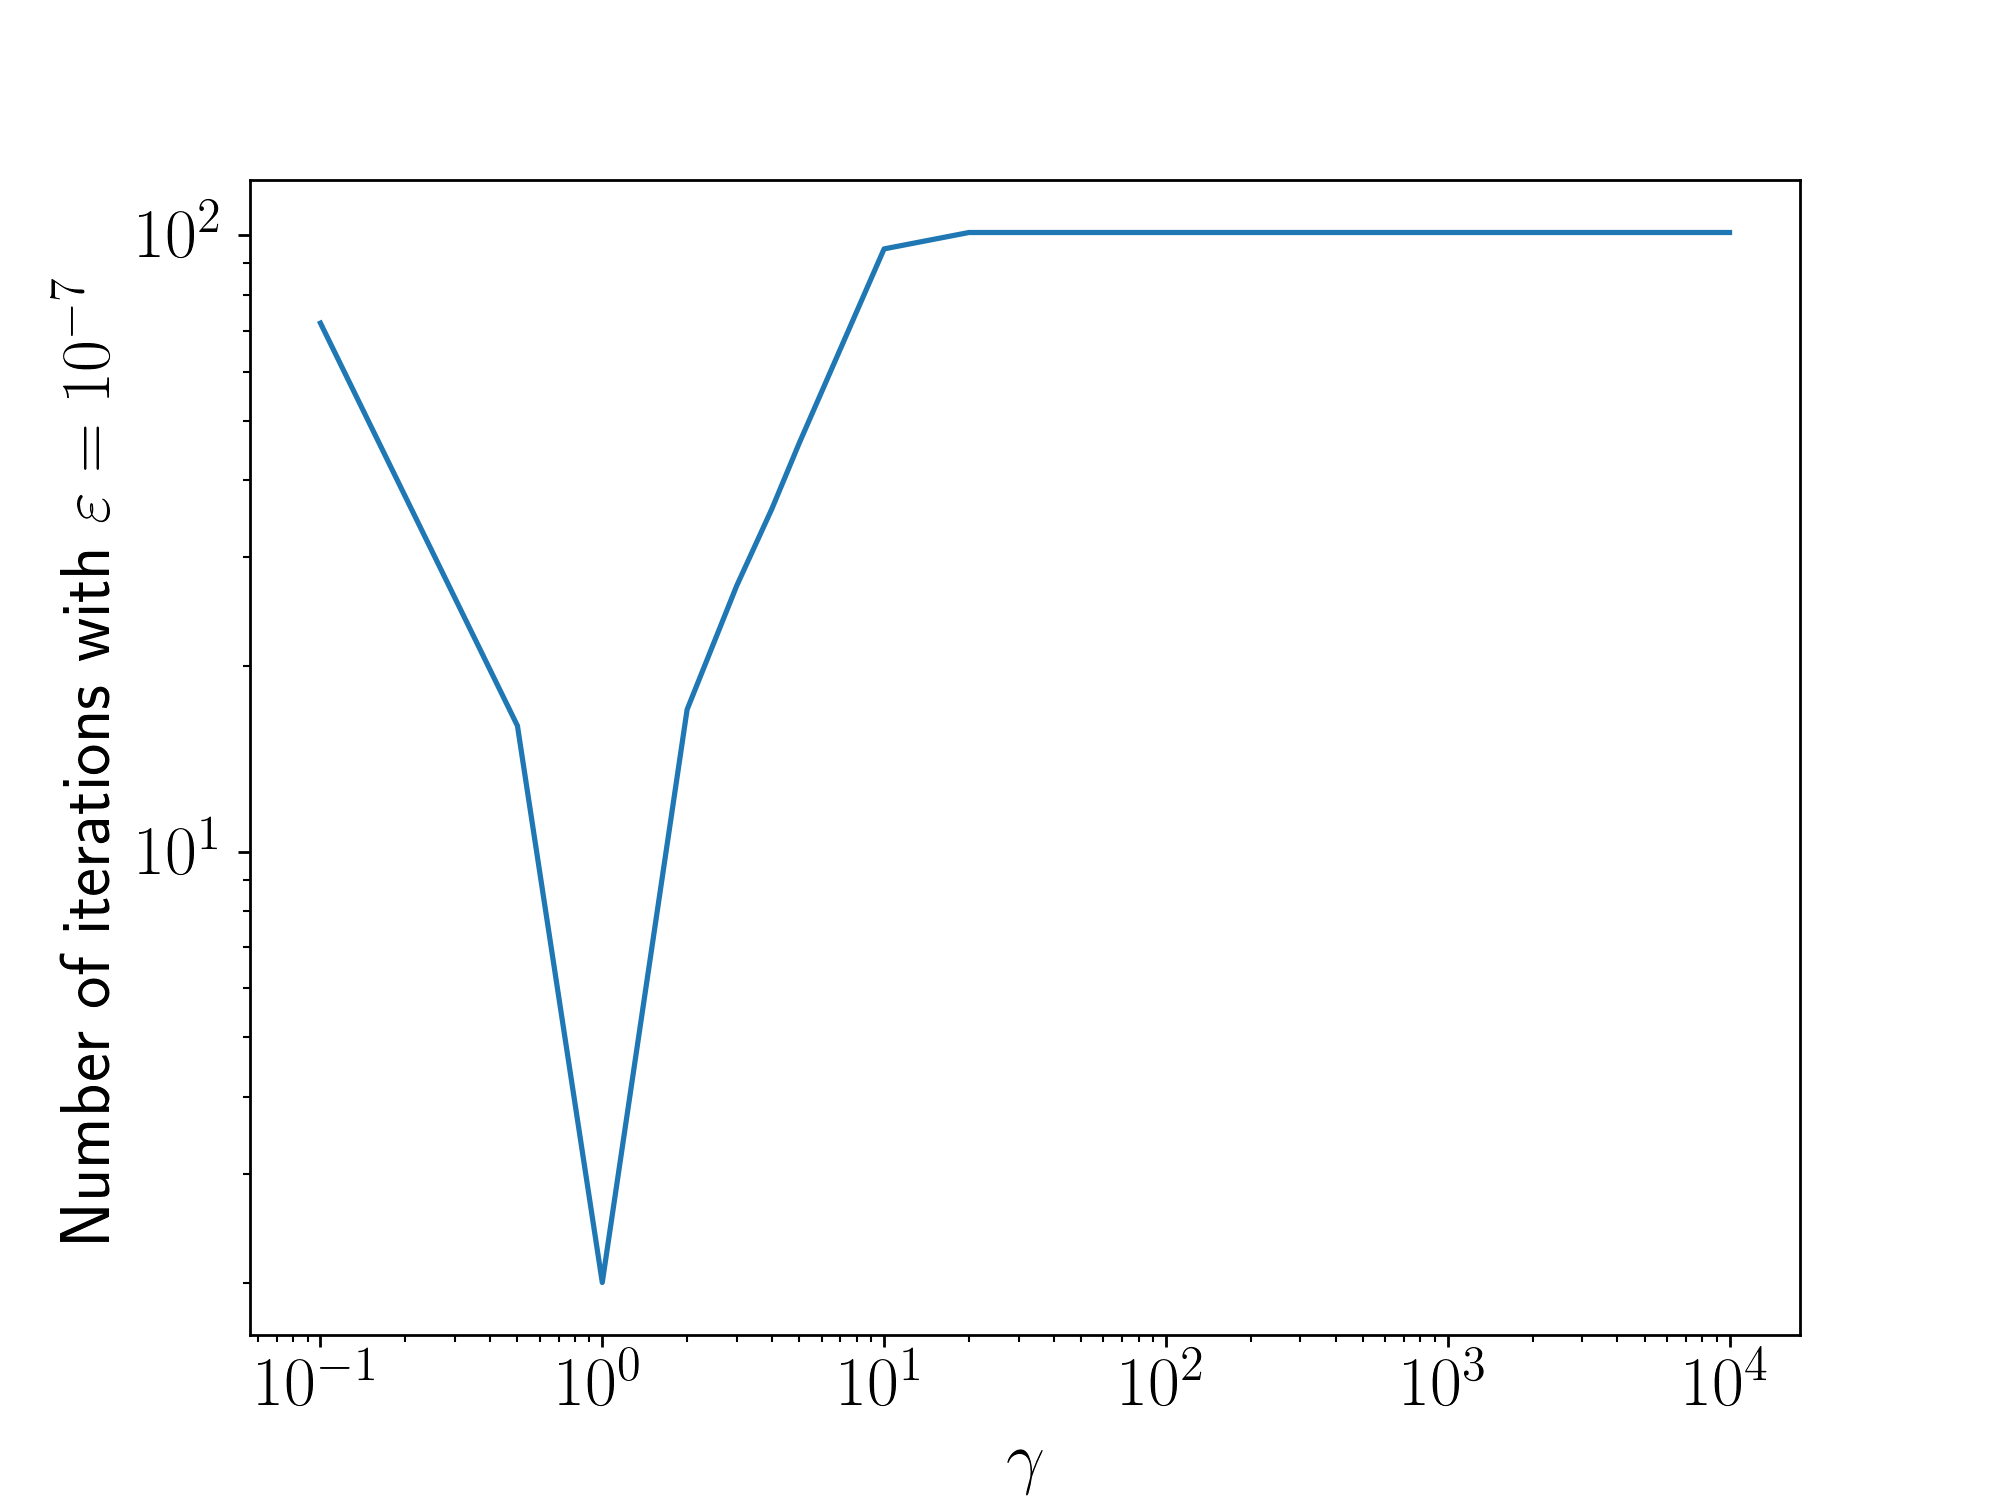

Text(0,0.5,'Number of iterations with $\\varepsilon = 10^{-7}$')

In [3]:
plt.rc("text", usetex=True)

gammas = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 50, 100, 1000, 5000, 10000]
# gammas = [1]
num_iter_converg = []
for g in gammas:
    A = np.array([[1, 0], 
                  [0, g]], dtype=np.float64)
    f = lambda x: my_f(x, A)
    gradf = lambda x: my_gradf(x, A)
#     x0 = np.random.rand(A.shape[0])
#     x0 = np.sort(x0)
#     x0 = x0[::-1]
    x0 = np.array([g, 1], dtype=np.float64)
#     print x0[1] / x0[0]
    gd = methods.fo.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A))
    x = gd.solve(x0, tol=1e-7, max_iter=100)
    num_iter_converg.append(len(gd.get_convergence()))

plt.figure(figsize=(8, 6))
plt.loglog(gammas, num_iter_converg)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(r"$\gamma$", fontsize=20)
plt.ylabel(r"Number of iterations with $\varepsilon = 10^{-7}$", fontsize=20)

- If the initial guess vector is chosen inappropriately, convergence for the poorly conditioned problem is very slow
- If the initial guess vector is chosen randomly, convergence can be much faster than theoretic estimate
- **Open problem:** get convergence theorem with estimate using random initial guess and not the worst one

## Experiment with multidimensional problem 
Let $A \in \mathbb{R}^{m \times n}$ be given matrix. 
Consider the linear inequalities system: $Ax \leq 1$ subject to $|x_i| \leq 1$ for all $i$.

**Definition.** Analytical center of the inequlity system $Ax \leq 1$ subject to $|x_i| \leq 1$ is a solution of the following optimization problem

$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$

$$
f'(x) - ?
$$

In [9]:
n = 100
m = 200
x0 = np.zeros(n)
A = np.random.rand(n, m)

### Exact solution with CVXPy

In [10]:
import cvxpy as cvx
print(cvx.installed_solvers())
x = cvx.Variable(n, 1)

obj = cvx.Minimize(cvx.sum_entries(-cvx.log(1 - A.T * x)) - 
                   cvx.sum_entries(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True)
x = x.value
print("Optimal value =", prob.value)

['ECOS', 'ECOS_BB', 'SCS', 'LS']
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 20700, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 500, constraints m = 1200
Cones:	soc vars: 300, soc blks: 100
	exp vars: 900, dual exp vars: 0
Setup time: 1.45e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.33e+02  2.71e+03  7.93e-01 -3.36e+04 -3.88e+03  0.00e+00  5.62e-03 
    80| 5.17e-05  6.60e-04  3.63e-05 -6.50e+02 -6.50e+02  1.44e-13  2.17e-01 
-----------------------------------------------------------

### Solving with gradient descent

In [11]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), \
                          axis=1) + 2 * x / (1 - np.power(x, 2))

Convergence in 17 iterations
Norm of gradient = 3.4759921273694527e-06
Function value = -649.7895632389148


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


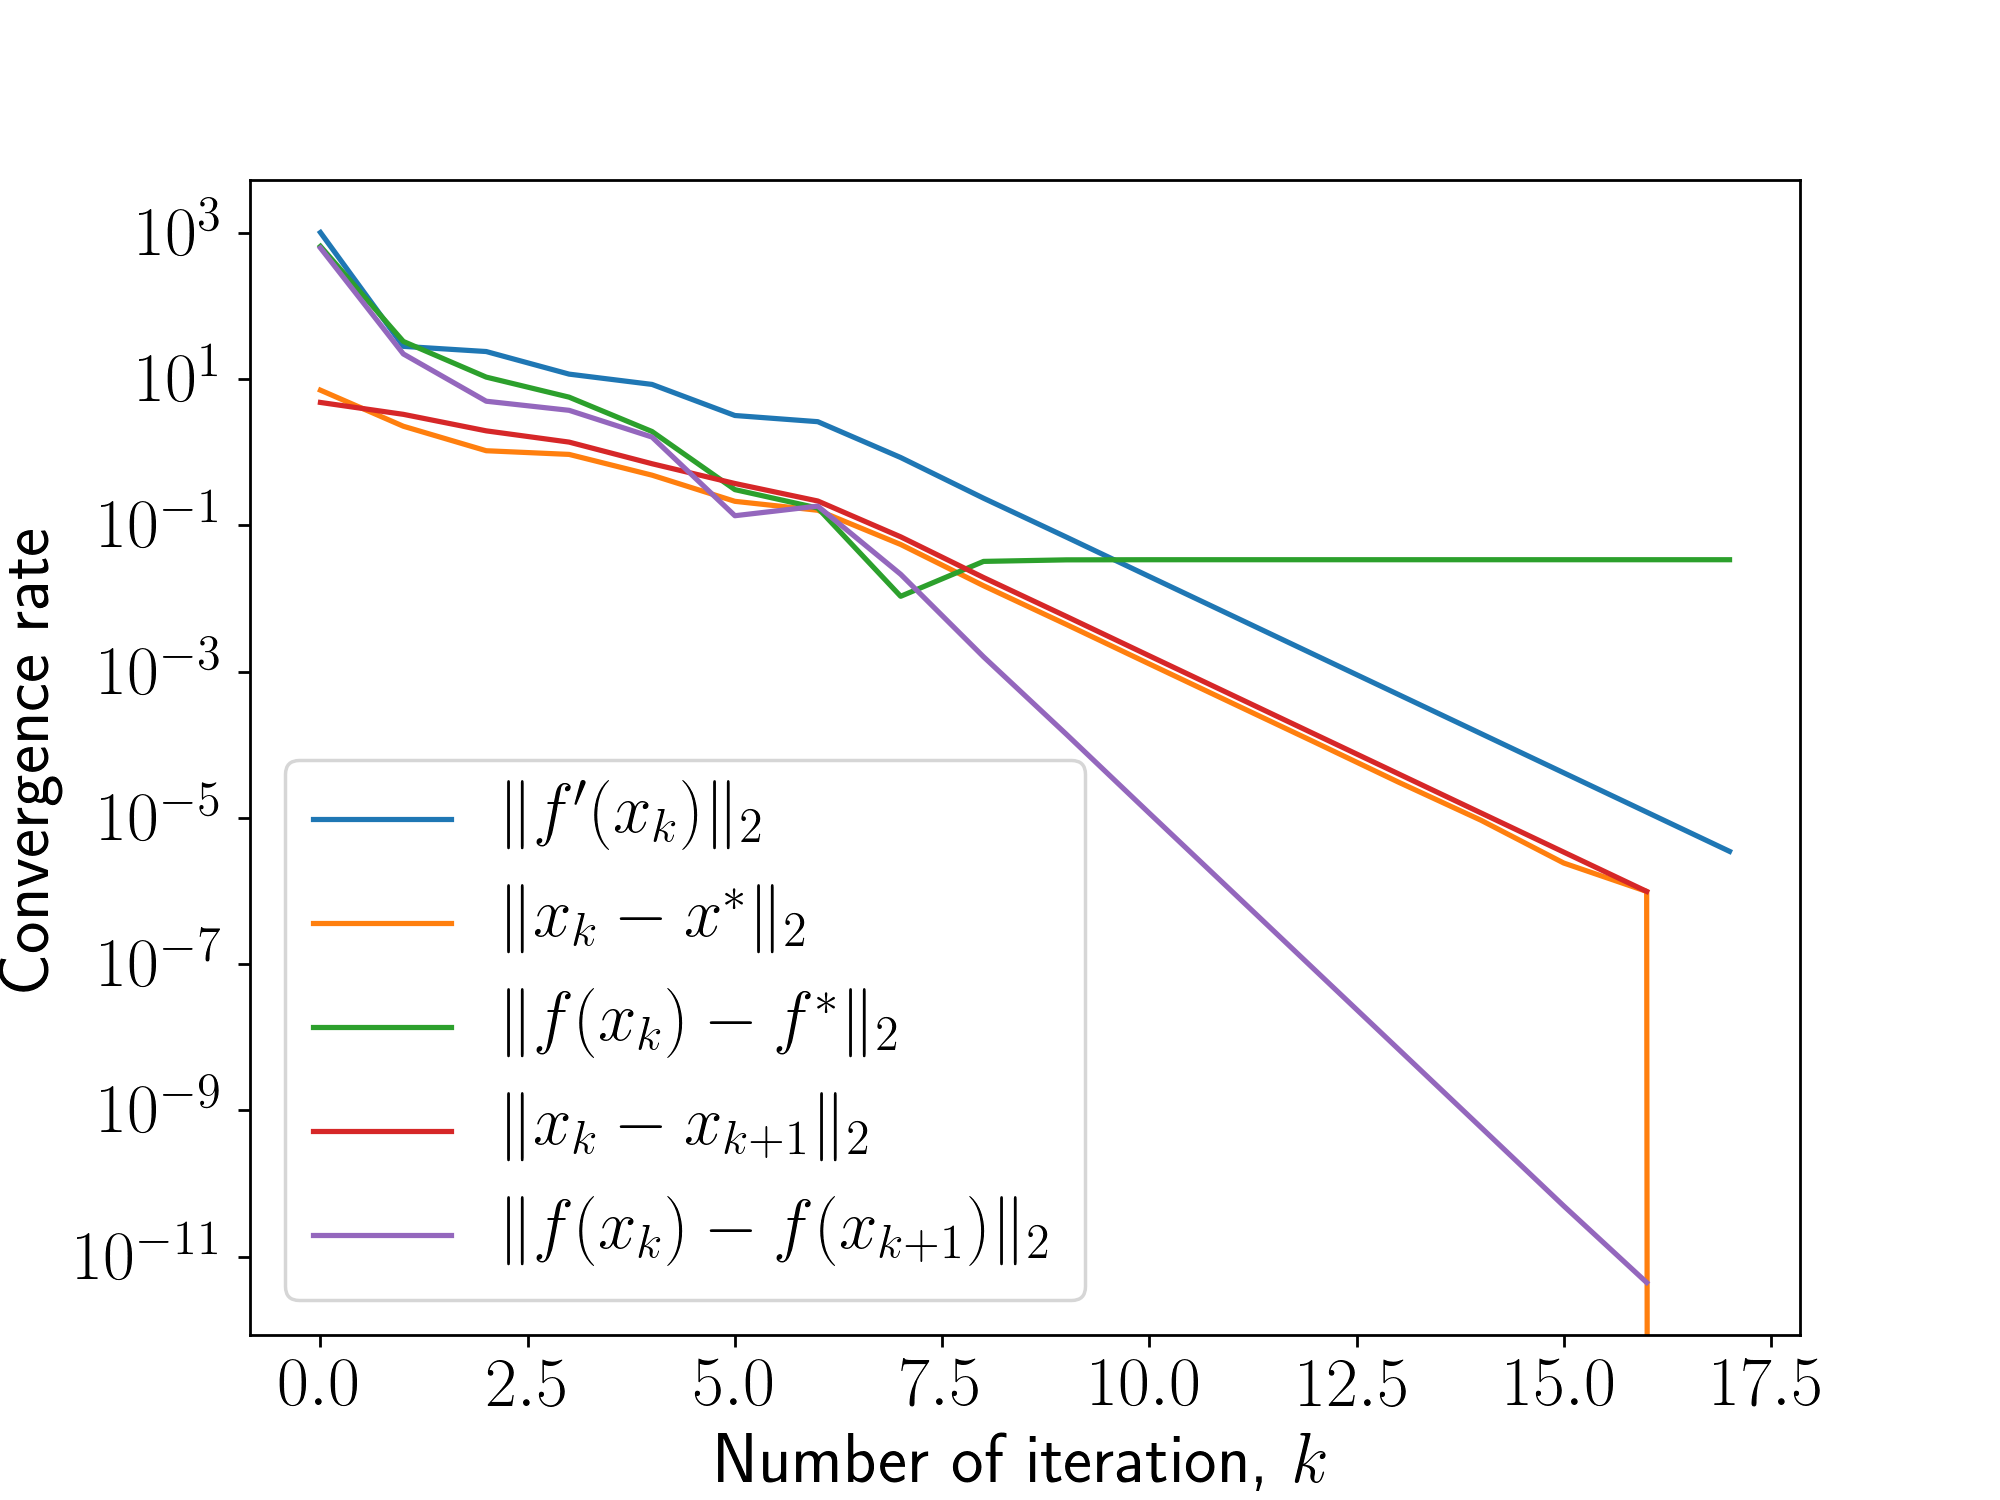

In [12]:
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.))
x = gd.solve(x0, tol=1e-5, max_iter=100, disp=True)

x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.semilogy([np.linalg.norm(x - np.array(x_k)) for x_k in x_conv], label=r"$\|x_k - x^*\|_2$")
plt.semilogy([np.linalg.norm(prob.value - f(np.array(x_k))) for x_k in x_conv], label=r"$\|f(x_k) - f^*\|_2$")
plt.semilogy([np.linalg.norm(np.array(x_conv[i]) - np.array(x_conv[i+1])) for i in range(len(x_conv) - 1)], label=r"$\|x_k - x_{k+1}\|_2$")
plt.semilogy([np.linalg.norm(f(np.array(x_conv[i])) - f(np.array(x_conv[i+1]))) for i in range(len(x_conv) - 1)], label=r"$\|f(x_k) - f(x_{k+1})\|_2$")
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

## Dependence of the convergence speed on the backtracking parameters

For simplicity, we use only Armijo rule

- Dependence on $\rho$
- Dependence on $\beta_1$

#### Dependence on $\rho$

The value of $\rho$ indicates how aggresively step size is decreased during backtracking

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


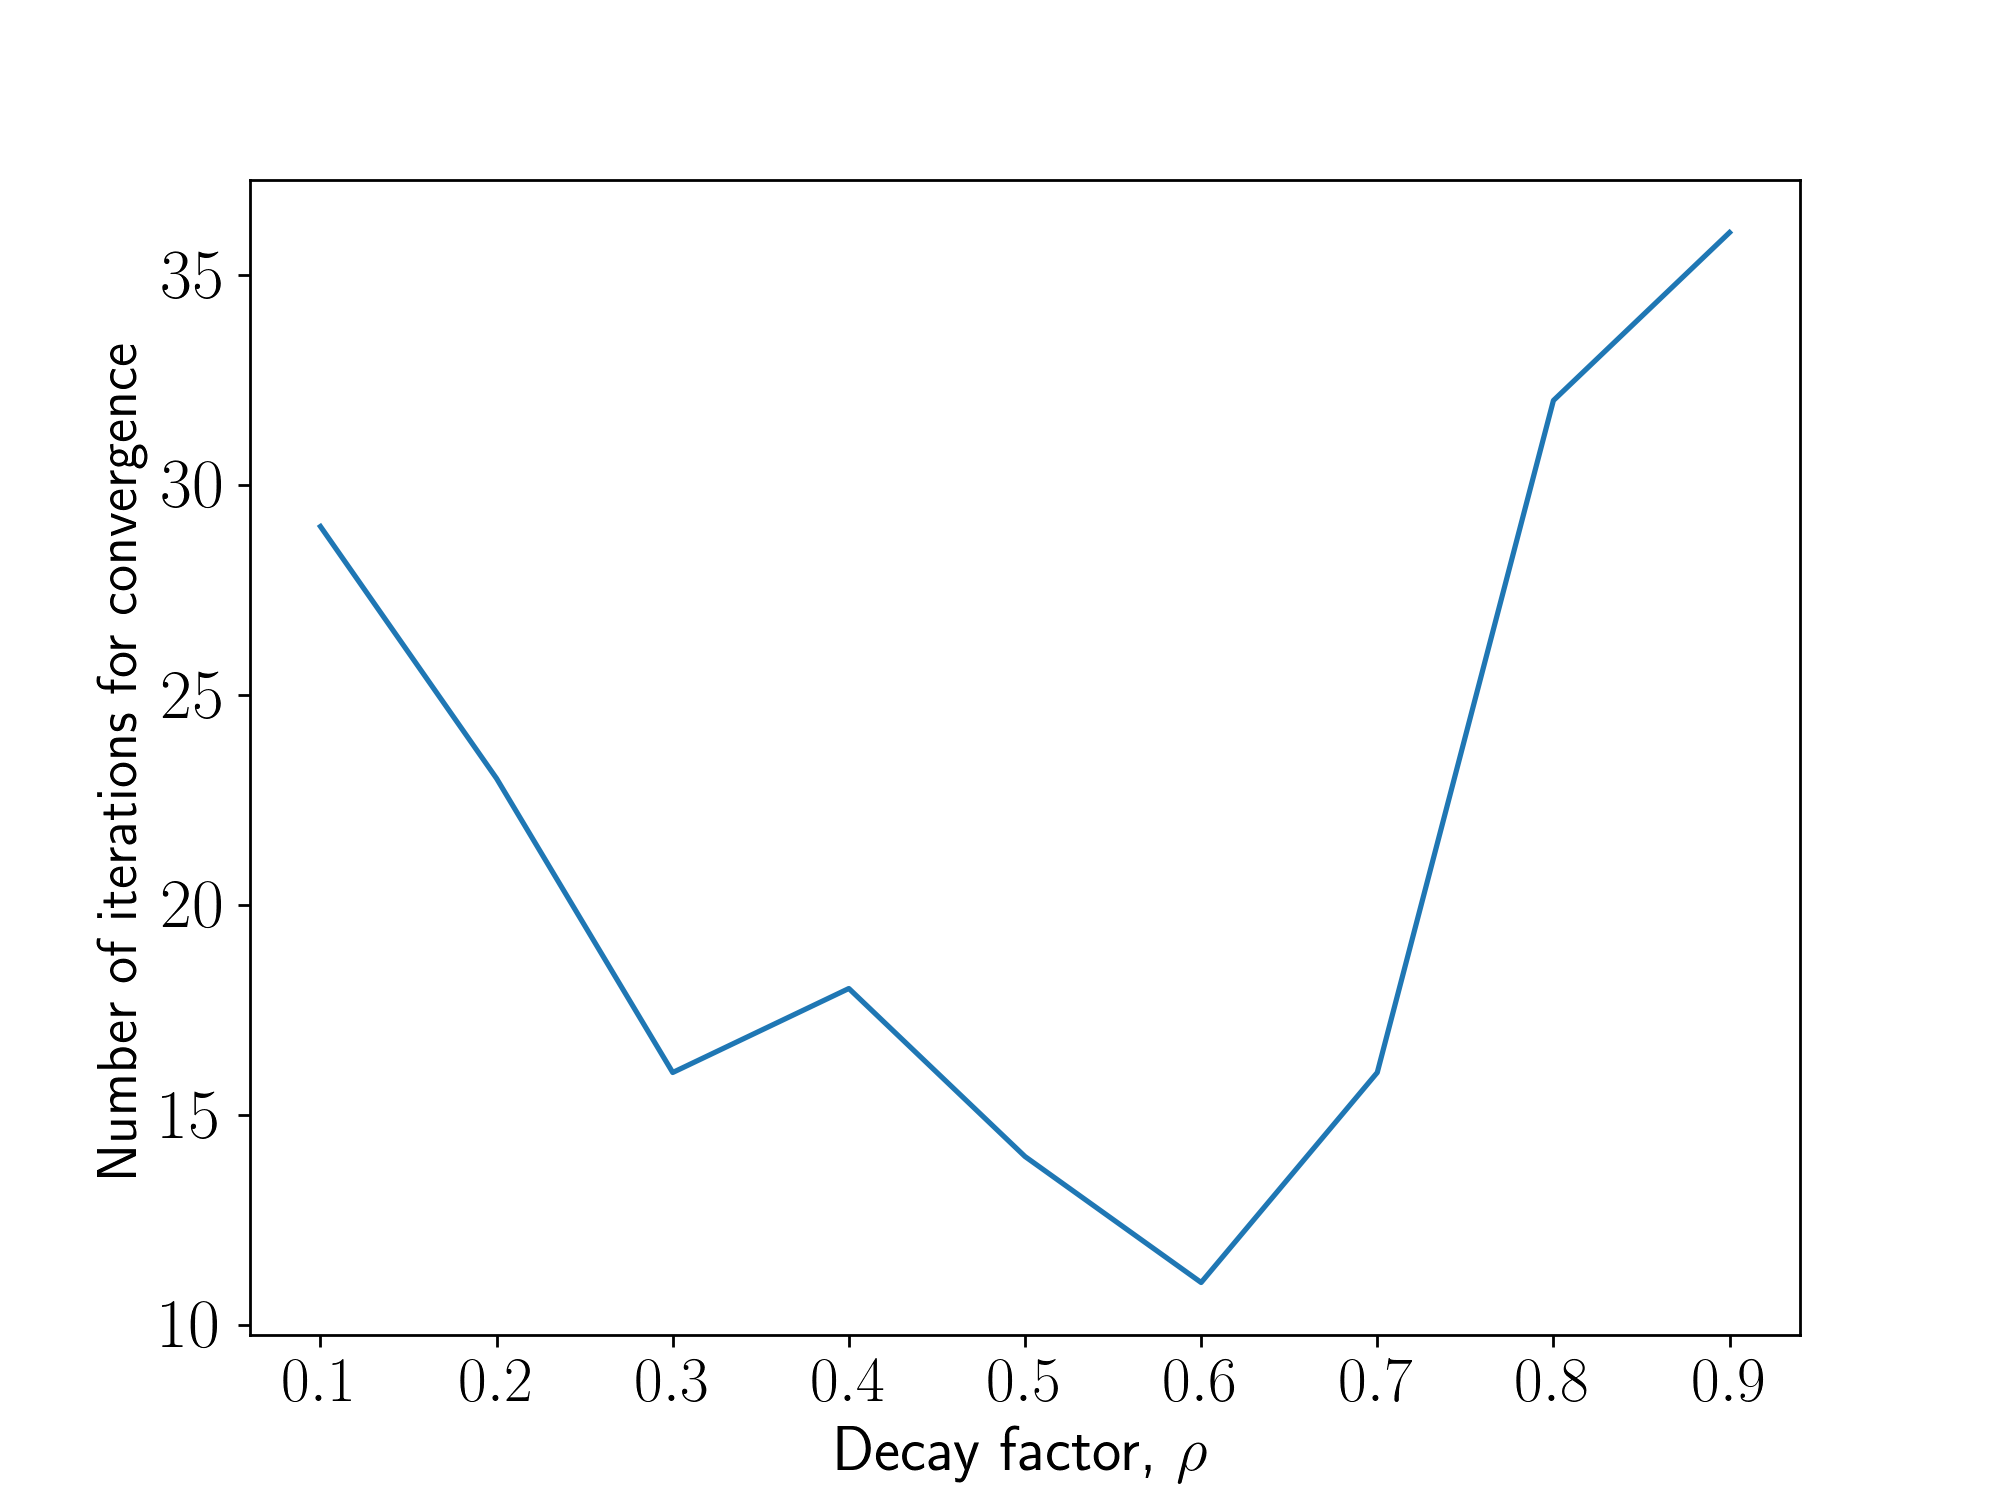

In [13]:
rhos = [0.1 + i * 0.1 for i in range(9)]
conv_iter = []
hist_x = []
callback = lambda x: my_callback(x, hist_x)
for rho in rhos:
    gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking(rule_type="Armijo", beta=0.1, rho=rho, init_alpha=1.)) 
    x = gd.solve(x0, tol=1e-4, max_iter=100)
    conv_iter.append(len(gd.get_convergence()))
    
#     plt.semilogy(range(1, len(grad_norm) + 1), grad_norm, label=r"$\rho$ = " + str(rho))
    hist_x = []
plt.figure(figsize=(8, 6))
plt.plot(rhos, conv_iter)
plt.xlabel(r"Decay factor, $\rho$", fontsize=18)
plt.ylabel(r"Number of iterations for convergence", fontsize=16)
plt.xticks(fontsize = 18)
_ = plt.yticks(fontsize = 20)

#### Dependence on $\beta_1$

Coefficient $\beta_1$ affects slope of linear approximation, with which we compare $f(x_k - \alpha_k f'(x_k))$. 

<IPython.core.display.Javascript object>


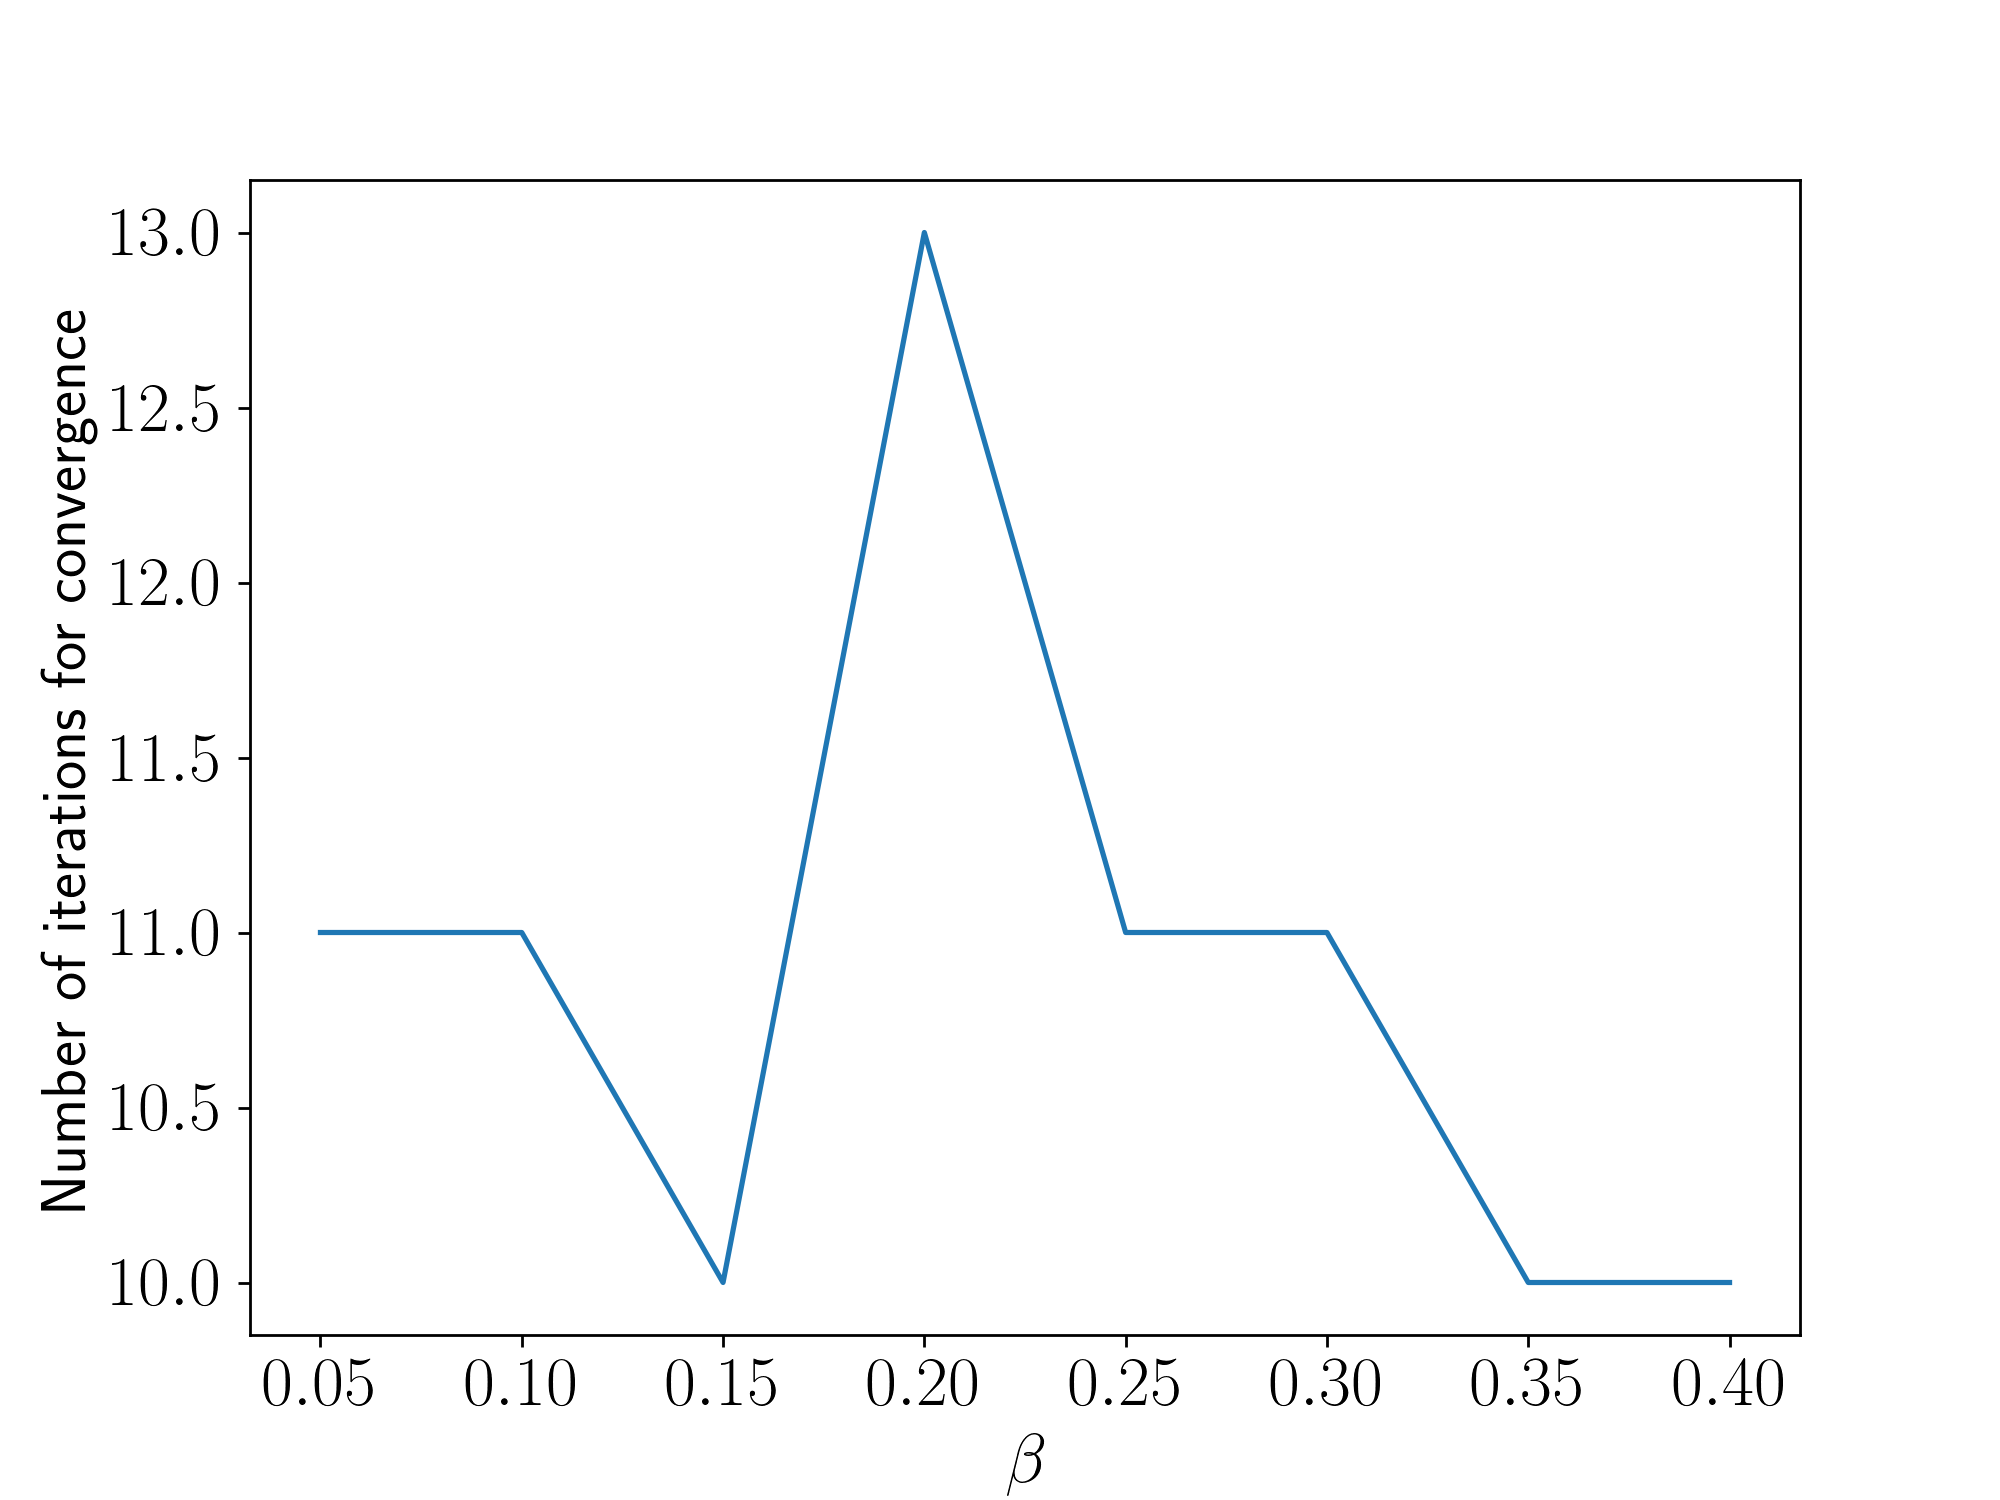

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [15]:
betas = [0.05 + i * 0.05 for i in range(8)]
hist_x = []
num_iter_conv = []
plt.figure(figsize=(8, 6))
for beta in betas:
    gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking(rule_type="Armijo", beta=beta, rho=0.6, init_alpha=1.)) 
    x = gd.solve(x0, tol=1e-4, max_iter=100)
    num_iter_conv.append(len(gd.get_convergence()))
    hist_x = []
plt.plot(betas, num_iter_conv)
plt.xlabel(r"$\beta$", fontsize=20)
plt.ylabel(r"Number of iterations for convergence", fontsize=18)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

## Pro & Contra

Pro
- it is easy to implement
- it convereges at least to stationary point
- moreover recent [paper](https://arxiv.org/pdf/1602.04915.pdf) shows that gradient descent converges to a local minimizer, almost sure with random initialization
- parameters of backtracking affect convergence not very strong
- it has numerous modifications

Contra
- it converges linearly
- it strong depends on the condition number of $f''(x)$, random initial guess vector can help
- it is not optimal for convex and strong convex functions with Lipschitz gradient (see. [Nesterov acceleration](https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/))

## Recap
1. Descent method
2. Descent direction
3. Gradient descent method
4. Step size selection rules
5. Convergence theorem
6. Experiments